**Content**

* **Linear Regression**
* **KNN Algorithm**
     * *Grid Search Cross Validation*
* **Data Visualization**
* **Confusion Matrix**

> *Finding linear equations between two properties using **Linear Regression***
> 
> *With the **KNN algorithm**, it is determined whether the non-classifiable data belong to the predetermined 2 classes.*
> 
> **Grid Search Cross Validation**  *finds the best* **K** *value*
> 
> **Data visualization** *enables data visualization*
> 
> **Confusion Matrix** *It specifies which values are incorrectly estimated and which values are estimated correctly.*

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression #Linear Regression 
from sklearn.neighbors import KNeighborsClassifier #KNN Algorithm
from sklearn.model_selection import train_test_split #Trian and Test Split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input"))

# Any results you write to the current directory are saved as output.

['column_2C_weka.csv', 'column_3C_weka.csv']


In [2]:
dataframe1 = pd.read_csv('input/column_2C_weka.csv') #read to file

**Please see below**

> *Let's look at the names of the column of our data*

*It is important to know the names of the types that can cause problems with column names*

In [3]:
print(dataframe1.columns) 

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')


**Please see below**

**Let's read our file's information**

> **sacral_slope andpelvic_radius values are very important for this kernel. Let's see if I have NaN(Missing Value) values in my set? We see this in the information screen below. However, it will be more useful to see visually.**

In [4]:
print(dataframe1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB
None


**Please see below**

> *Black: Available Data*
> 
> *White: Missing Data*
> 
> *sacral_slope: Column name1*
> 
> *pelvic_radius: Column name2*

**NOTE: No white band because there is no NaN value**

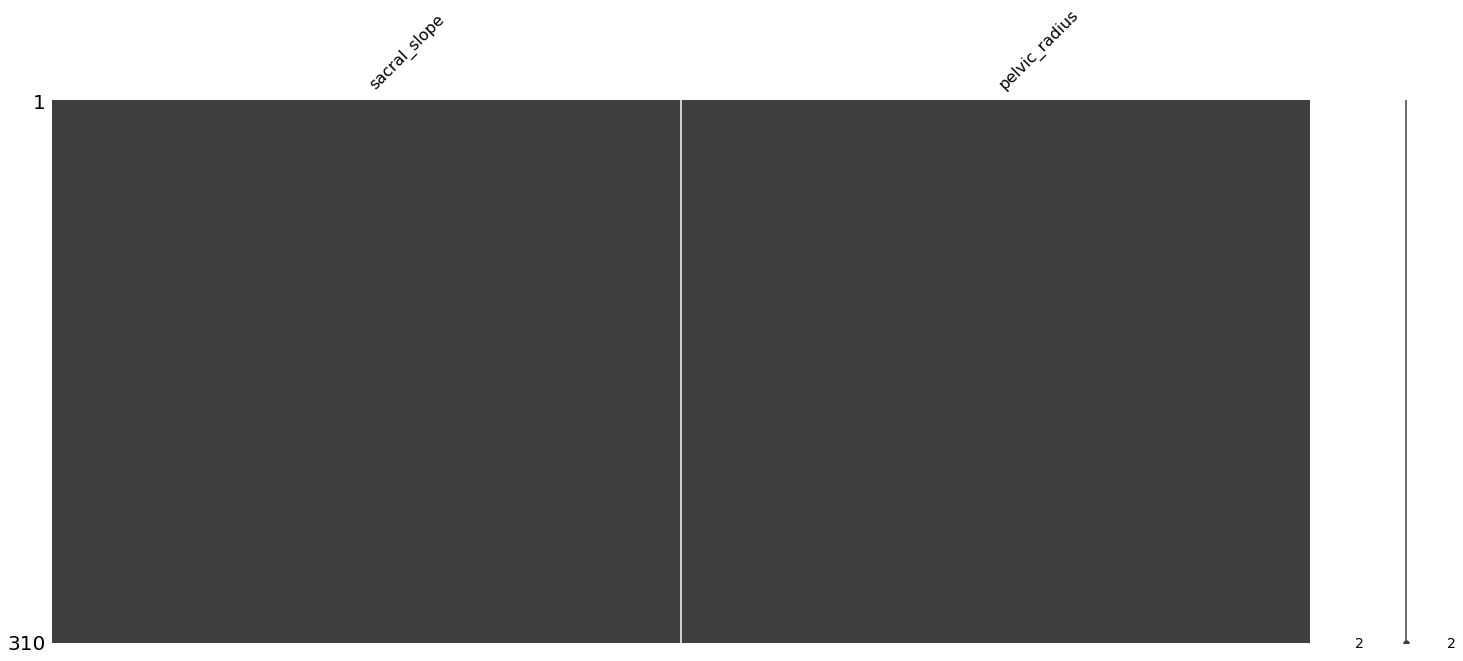

In [5]:
newBioDataFrame = dataframe1.loc[:,["sacral_slope","pelvic_radius"]]
import missingno as msno
msno.matrix(newBioDataFrame)
plt.show()

**Please see below**

> **Same as above but This is shown as a bar plot**

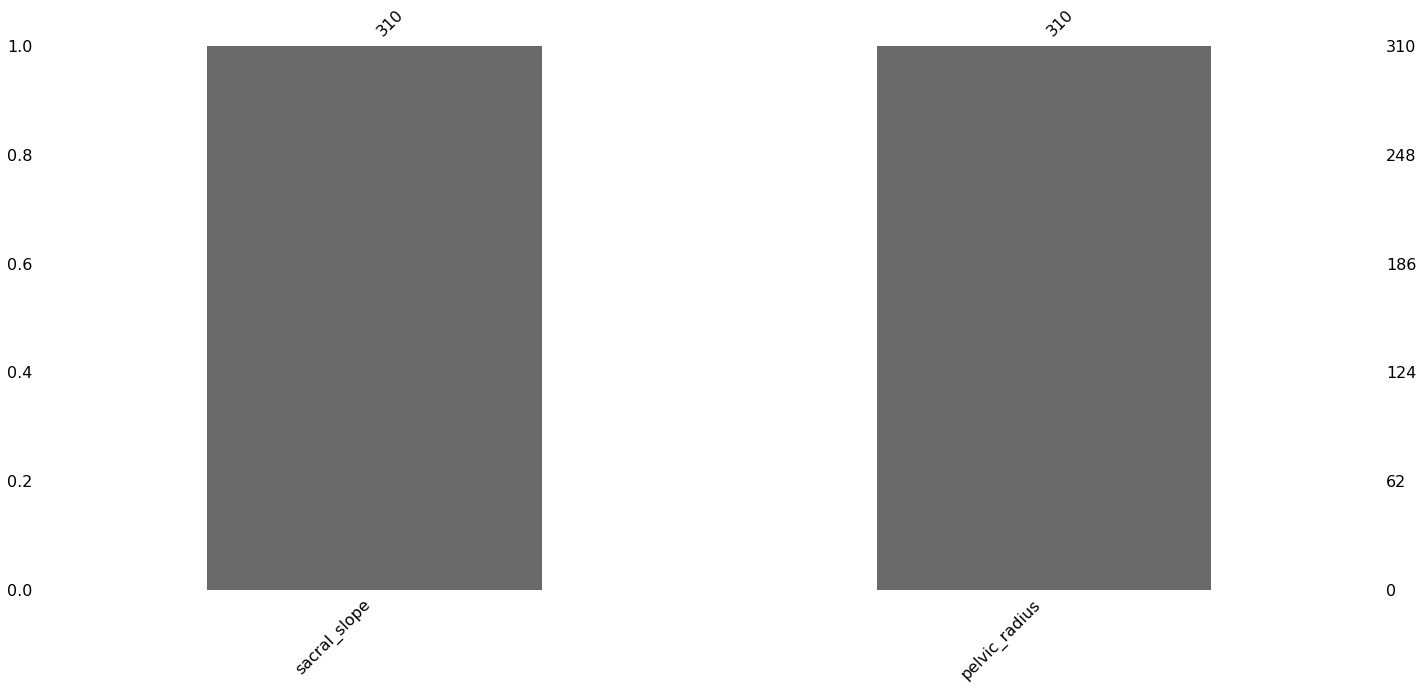

In [6]:
msno.bar(newBioDataFrame)
plt.show()

**Please see below**

> **The first 10 data in the data set**

In [7]:
dataframe1.head()

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027818            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal  
1     114.405425                  4.564259  Abnormal  
2     105.985135                 -3.530317  Abnormal  
3     101.868495                 11.211523  Abnormal  
4     108.168725                  7.918501  Abnormal

**Please see below**

> **The last 10 data in the data set**

In [8]:
dataframe1.tail()

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
305         47.903565            13.616688              36.000000   
306         53.936748            20.721496              29.220534   
307         61.446597            22.694968              46.170347   
308         45.252792             8.693157              41.583126   
309         33.841641             5.073991              36.641233   

     sacral_slope  pelvic_radius  degree_spondylolisthesis   class  
305     34.286877     117.449062                 -4.245395  Normal  
306     33.215251     114.365845                 -0.421010  Normal  
307     38.751628     125.670725                 -2.707880  Normal  
308     36.559635     118.545842                  0.214750  Normal  
309     28.767649     123.945244                 -0.199249  Normal

**Please see below**

*Numerical Analysis*

> The maximum values in the Pelvik_radius column are too high

In [9]:
dataframe1.describe()

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
count        310.000000           310.000000             310.000000   
mean          60.496653            17.542822              51.930930   
std           17.236520            10.008330              18.554064   
min           26.147921            -6.554948              14.000000   
25%           46.430294            10.667069              37.000000   
50%           58.691038            16.357689              49.562398   
75%           72.877696            22.120395              63.000000   
max          129.834041            49.431864             125.742385   

       sacral_slope  pelvic_radius  degree_spondylolisthesis  
count    310.000000     310.000000                310.000000  
mean      42.953831     117.920655                 26.296694  
std       13.423102      13.317377                 37.559027  
min       13.366931      70.082575                -11.058179  
25%       33.347122     110.709196                  1.603727  
50%       42.404912     118.268178                 11.767934  
75%       52.695888     125.467674                 41.287352  
max      121.429566     163.071041                418.543082

In [10]:
trace1 = go.Box(
    y = dataframe1.sacral_slope,
    name = "sacral_slope",
    marker = dict(color = "red")
)
trace2 = go.Box(
    y = dataframe1.pelvic_radius,
    name = "pelvic_radius",
    marker = dict(color = "blue")
)
concatTrace = [trace1,trace2]
iplot(concatTrace)

**Please see below**

> **if you apply Linear Regression to the following graph**

**Please see below**

> **We used a linear regression method to generate a straight line**

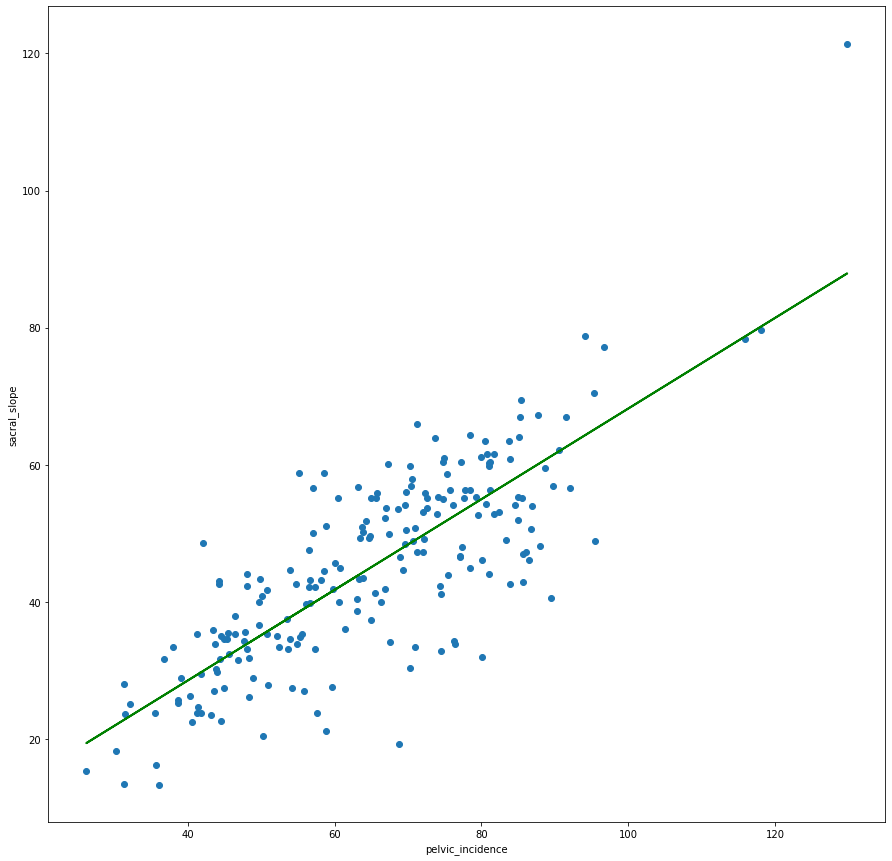

R^2 score:  0.6458410481075871


In [11]:
dataFilter = dataframe1[dataframe1['class'] == 'Abnormal']
linear_regression = LinearRegression()
x = dataFilter.pelvic_incidence.values.reshape(-1,1)
y = dataFilter.sacral_slope.values.reshape(-1,1)
linear_regression.fit(x,y)

y_head = linear_regression.predict(x)

plt.figure(figsize=[15,15])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')

plt.plot(x,y_head,color="green",linewidth=2)
plt.show()

from sklearn.metrics import r2_score
print('R^2 score: ',r2_score(y,y_head))

**Notes on Linear Regression**

> Linear Regression,can be thought of as a simple reduction(Regression) of the dataset on complex computations and measurements of many. It is here, however, to be able to derive such an equilibrium equation from the values of the data in the data set.

*R squared tells you how good the "fit" of your model is or better said how well the line you might draw through your points fits. Its a regression thing*

The score of R ^ 2 was found to be **0.6458410481075871**  **This value tells us that we need to improve our model**


**Notice That**

*The features used in the CNN algorithm with Linear Regression are different.*

**Please see below**

> *I collapsed the dataset according to the abnormal and normal key words*

*I then plotted a graph based on the headings **pelvic_radius** and **lumbar_lordosis_angle**.*

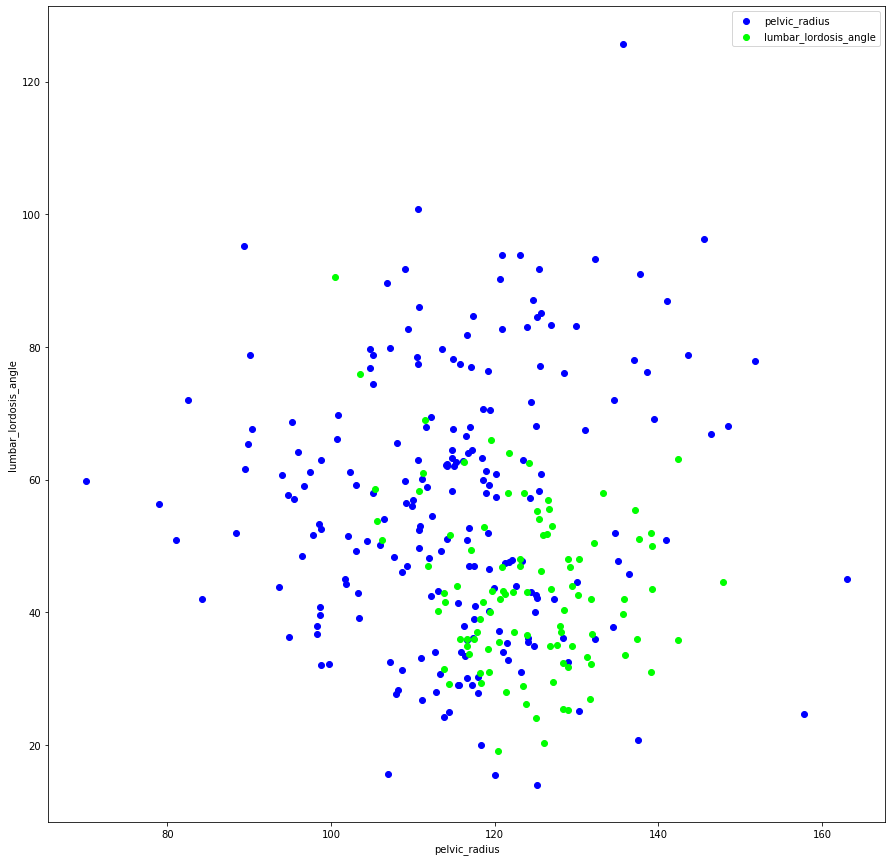

In [12]:
Abnormal = dataframe1[dataframe1["class"] == "Abnormal"]
Normal = dataframe1[dataframe1["class"] == "Normal"]

plt.figure(figsize=(15,15))
plt.scatter(Abnormal.pelvic_radius,Abnormal.lumbar_lordosis_angle,color="blue",label="pelvic_radius")
plt.scatter(Normal.pelvic_radius,Normal.lumbar_lordosis_angle,color="lime",label="lumbar_lordosis_angle")
plt.legend()
plt.xlabel("pelvic_radius")
plt.ylabel("lumbar_lordosis_angle")
plt.show()

**Please see below**

> *Abnormal and Normal values are converted from characters to integer.* (**y** values must be in integer type)

**What is normalization:**
*When there is a lot of difference between the data, the data is handled in a single order.*
> If we have such values in my dataset, we can get an inaccurate analysis. So it is important to normalize

**What is train data:**
*I am making sure that my model knows the data by separating the data in the dataset*

> Next, I would like my model to estimate the test data using test data.

In [13]:
dataframe1["class"] = [1 if(each == "Abnormal") else 0 for each in dataframe1["class"]]
y = dataframe1["class"].values
x_data = dataframe1.drop(["class"],axis=1)

#Normalization
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

#Train and Test values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

**Please see below**

***How do I choose the best K value in the KNN algorithm?***
*I do this with the following lines of code*

> The best value is like **13** 

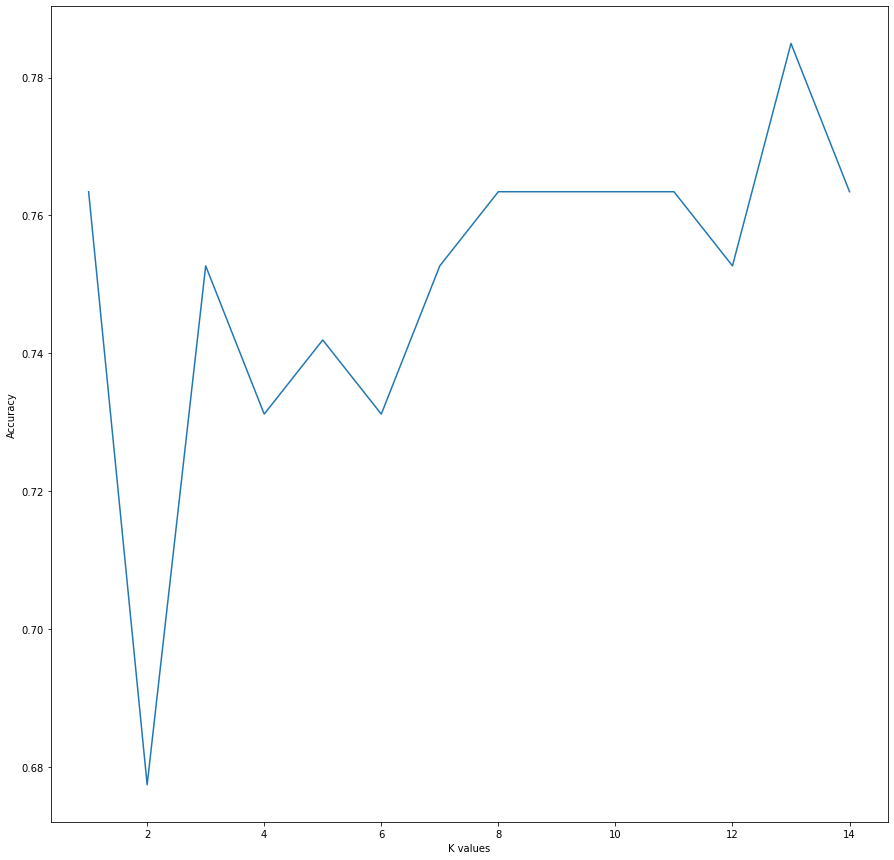

In [14]:
score_list = []
for eachs in range(1,15):
    knnAlgorithm1 = KNeighborsClassifier(n_neighbors = eachs)
    knnAlgorithm1.fit(x_train,y_train) #Modeli eğitiyorum
    score_list.append(knnAlgorithm1.score(x_test,y_test))
plt.figure(figsize=(15,15))
plt.plot(range(1,15),score_list)
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.show()

**Please see below**

**Notes on Grid Search Cross Validation**
> One of the important problems in the **KNN** algorithm is that **K** is chosen.
> 
> *In the above code line*, we can choose the value of **K** by trial. Of course we have to determine the *range*
> 
> **Grid Search Cross-Validation algorithm** can be used to find the best **K** value
> 
> The best **K** value from 1 to 50 is 31 dir

*NOTICE THAT: We will still use the old value instead of completely changing the codes*

In [15]:
import warnings
warnings.filterwarnings("ignore")

section = {"n_neighbors":np.arange(1,50)}
knnAlgorithm2 = KNeighborsClassifier()
knnAlgorithm_cv = GridSearchCV(knnAlgorithm2,section,cv = 10)
knnAlgorithm_cv.fit(x_train,y_train)
print("Best K value: ", knnAlgorithm_cv.best_params_)
print("And the best guess score: ",knnAlgorithm_cv.best_score_)

Best K value:  {'n_neighbors': 7}
And the best guess score:  0.8296536796536798


**Please see below**

*I use the following **KNN** algorithm to find out which class my test data belongs to*

NOTE: For detailed description of the algorithm **https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners** (8.Chapter)

**What is fit?** Use to train our model 

**What is predict?** *Take test data and make estimates based on the training received*

**Notice That:** When K is 13, the estimated correct ratio: **0.7849462365591398**

In [16]:
knnAlgorithm = KNeighborsClassifier(n_neighbors=13)
knnAlgorithm.fit(x_train,y_train)
predict = knnAlgorithm.predict(x_test)
print("{} nn Score {}: ".format(13,knnAlgorithm.score(x_test,y_test)))

13 nn Score 0.7849462365591398: 


**Please see below**

If we calculate the ratio between **0.784** and **93**, the result is **72.912**. Approximately **73** is accepted.

A list of estimated values is available below **(Predict:)**
The list of actual values is available below **(y_test:)**

**Notice That:** A simple line of code found **73** correct guesses and 20 false predictions **Here, 73 matches the above ratio**

In [17]:
truePredict = 0
falsePredict = 0
for p in range(len(predict)):
    for y in range(p,len(y_test)):
        if (predict[p] == y_test[y]):
            truePredict = truePredict +1
            break
        else:
            falsePredict = falsePredict +1
            break
print("True Predict: ",truePredict)
print("False Predict",falsePredict)
print("-------------------------------------------------------------------------------------")
print("Predict: ",predict)
print("-------------------------------------------------------------------------------------")
print("y_test: ",y_test)

True Predict:  73
False Predict 20
-------------------------------------------------------------------------------------
Predict:  [1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1
 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0
 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1]
-------------------------------------------------------------------------------------
y_test:  [1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1]


**Please see below**
> *Graph of True and False Estimates*

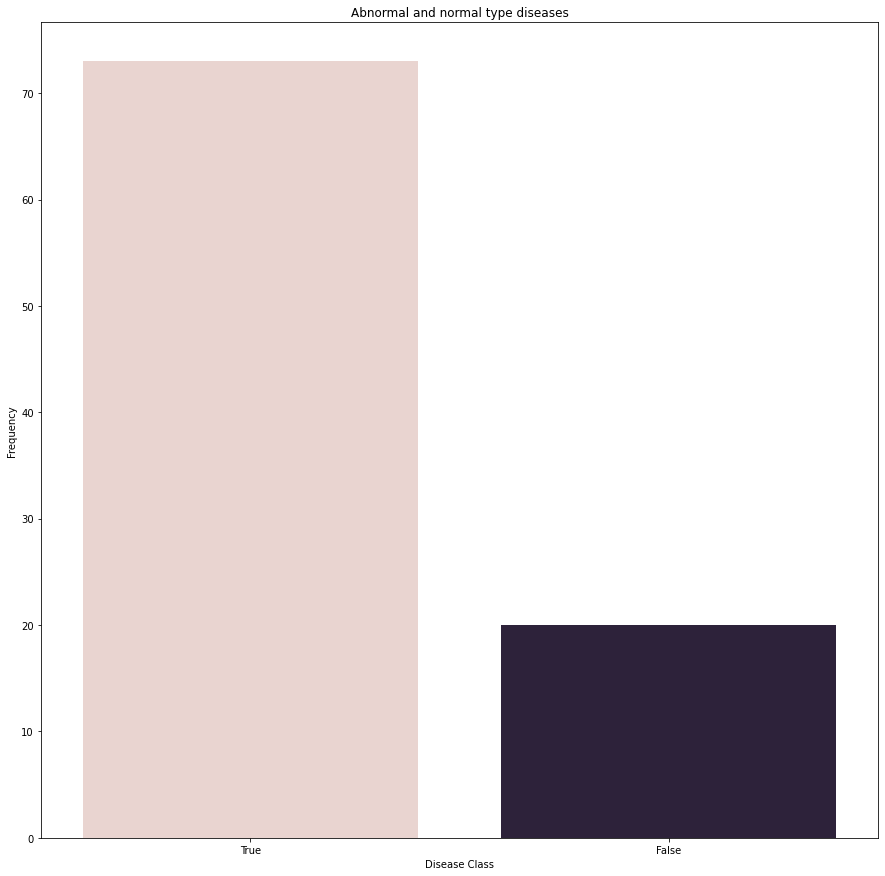

In [18]:
x_Axis = ["True","False"]
y_Axis = [truePredict,falsePredict]

plt.figure(figsize=(15,15))
sns.barplot(x=x_Axis,y=y_Axis,palette = sns.cubehelix_palette(len(x_Axis)))
plt.xlabel("Disease Class")
plt.ylabel("Frequency")
plt.title("Abnormal and normal type diseases")
plt.show()

**Please see below**

***Notes on Confusion Matrix***

> 1. *It specifies which values are incorrectly estimated and which values are estimated correctly.*
> 2. *The complexity matrix is used to show us what our estimates are*

*NOTE: The above code is an example of a confusion matrix without using the sklearn library.*

NOTE: **Number 1: Abnormal **  ,  **Number 0: Normal**


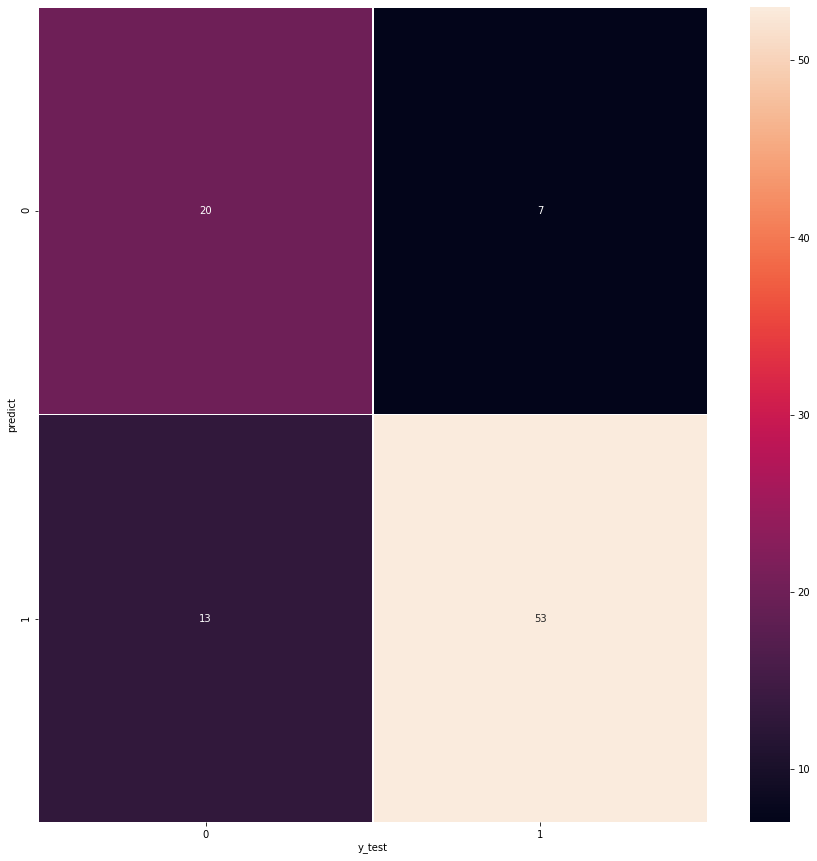

In [19]:
conf_matrix = confusion_matrix(y_test,predict)
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(conf_matrix,annot=True,linewidths=0.5,linecolor="white",fmt=".0f",ax=ax)
plt.xlabel("y_test")
plt.ylabel("predict")
plt.show()

**Notes on the KNN algorithm**

The KNN algorithm predicts which class the new data will belong to according to previously known graphs of classes A and B  

> In our example, **pelvic_radius** and **lumbar_lordosis_angle** correspond to class A and B, respectively.

> In our example, the ratio of the values we have correctly guessed is **0.7849462365591398**. This may be because our training datas are very close to each other. **You can see this in the above chart**